<a href="https://colab.research.google.com/github/serifeakbb/STM32F407-kart-ile-Ak-ll--Ev-Otomasyonu/blob/main/radar_yp_yayin_listesi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 RADAR EH SİSTEMLERİ - YAYIN LİSTESİ PROJESİ

1. Bölüm: Sentetik Radar PDW Verisi Oluşturuluyor...

12000 adet PDW verisi üretildi.
24 farklı emitter bulundu.
Radar Türleri: ['Hava_Savunma' 'Deniz_İzleme' 'Füze_İzSürme']

2. Bölüm: Görselleştirme yapılıyor...



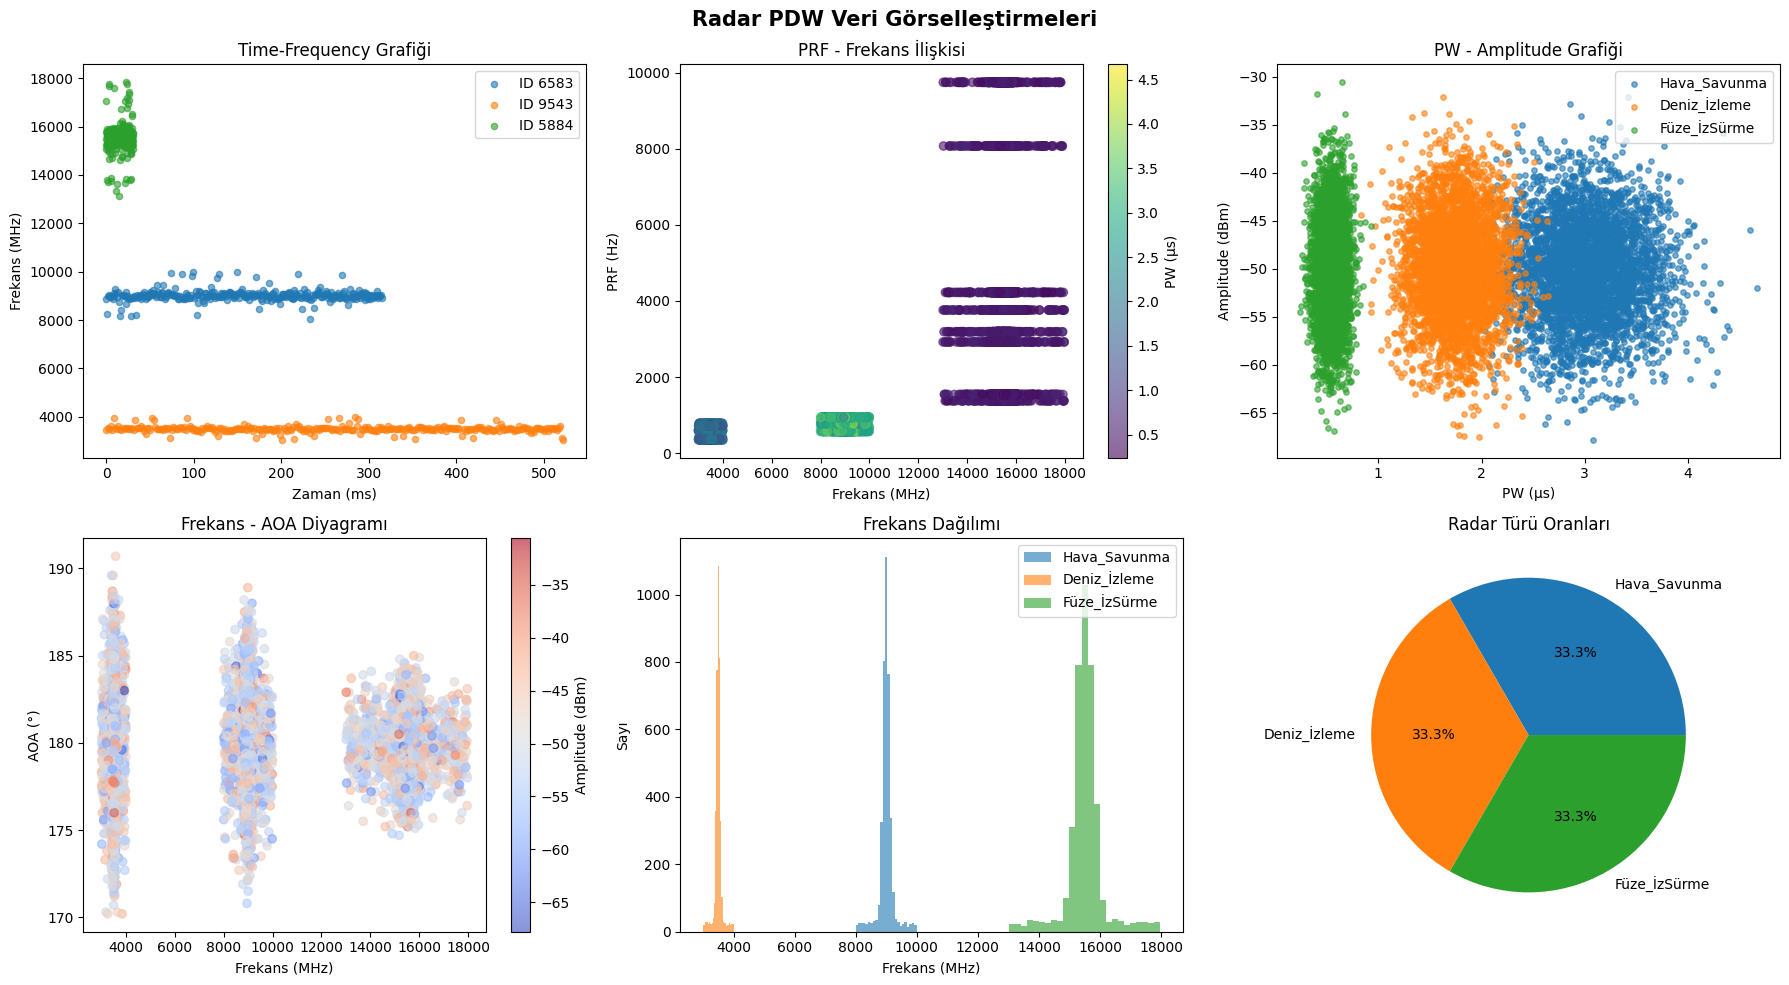

Grafikler kaydedildi (1_pdw_visualization.png)

3. Bölüm: Özellik Çıkarımı Yapılıyor...

   Emitter_ID   freq_mean    freq_std  freq_range  prf_mean  pw_mean  \
0        1024   3486.9920  116.844548       989.6     347.2  1.74680   
1        1755   9006.7806  217.864514      1928.2     576.9  2.95906   
2        2347   3494.7874  115.496088       970.1     365.7  1.73176   
3        2414  15506.7850  614.249812      4864.0    1374.9  0.55034   
4        2493  15451.4356  625.911355      4860.7    3189.8  0.54310   

   amp_mean  aoa_mean    Radar_Type  
0  -49.5902  180.1510  Deniz_İzleme  
1  -50.1010  180.0004  Hava_Savunma  
2  -50.1572  179.9880  Deniz_İzleme  
3  -49.5594  179.9564  Füze_İzSürme  
4  -50.1400  179.9654  Füze_İzSürme   

4. Bölüm: Makine Öğrenmesi Modelleri Eğitiliyor...

Random Forest doğruluk: 100.0 %
SVM doğruluk: 100.0 %

5. Bölüm: Yayın Listesi Oluşturuluyor...

Yayın listesi dosyası kaydedildi: yayin_listesi.csv

   EMITTER_ID   SİNYAL_TÜRÜ  FREKANS_MHz  PRF_

In [9]:
"""
RADAR ELEKTRONİK HARP (EH) SİSTEMLERİ
Yapay Zeka Destekli Yayın Listesi Oluşturma Projesi
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

print("="*60)
print(" RADAR EH SİSTEMLERİ - YAYIN LİSTESİ PROJESİ")
print("="*60 + "\n")


# 1. SENTETİK RADAR PDW VERİSİ OLUŞTURMA

print("1. Bölüm: Sentetik Radar PDW Verisi Oluşturuluyor...\n")

RADAR_TURLERI = {
    "Hava_Savunma": {
        "freq_min": 8000, "freq_max": 10000,
        "pw_min": 1.0, "pw_max": 5.0,
        "prf_min": 400, "prf_max": 1000,
        "aoa_std": 2.5
    },
    "Deniz_İzleme": {
        "freq_min": 3000, "freq_max": 4000,
        "pw_min": 0.5, "pw_max": 3.0,
        "prf_min": 300, "prf_max": 800,
        "aoa_std": 3.0
    },
    "Füze_İzSürme": {
        "freq_min": 13000, "freq_max": 18000,
        "pw_min": 0.1, "pw_max": 1.0,
        "prf_min": 1000, "prf_max": 10000,
        "aoa_std": 1.5
    }
}

def pdw_uret(radar_turu, n_pulse=500, emitter_id=None):
    p = RADAR_TURLERI[radar_turu]
    if emitter_id is None:
        emitter_id = np.random.randint(1000, 9999)

    prf = np.random.uniform(p["prf_min"], p["prf_max"])
    pri = 1000 / prf

    veri = []
    zaman = 0
    for i in range(n_pulse):
        toa = zaman + np.random.normal(0, pri * 0.01)
        zaman += pri

        # Frekans seçimi
        if np.random.rand() > 0.85:
            freq = np.random.uniform(p["freq_min"], p["freq_max"])
        else:
            freq = np.random.normal((p["freq_min"] + p["freq_max"]) / 2,
                                    (p["freq_max"] - p["freq_min"]) * 0.05)
        freq = np.clip(freq, p["freq_min"], p["freq_max"])

        # PW, AOA, Amplitude
        pw = np.clip(np.random.normal((p["pw_min"] + p["pw_max"]) / 2,
                        (p["pw_max"] - p["pw_min"]) * 0.1), p["pw_min"], p["pw_max"])
        aoa = np.random.normal(180, p["aoa_std"]) % 360
        amp = np.clip(np.random.normal(-50, 5), -80, -20)
        mod = np.random.choice(["Unmodulated", "FM", "Phase_Mod"])

        veri.append({
            "TOA_ms": round(toa, 3),
            "RF_MHz": round(freq, 1),
            "PW_us": round(pw, 2),
            "AOA_deg": round(aoa, 1),
            "Amplitude_dBm": round(amp, 1),
            "PRF_Hz": round(prf, 1),
            "Modulation": mod,
            "Emitter_ID": emitter_id,
            "Radar_Type": radar_turu
        })
    return veri

def veri_olustur(n_seq=24, n_pulse=500):
    tum_pdws = []
    turler = list(RADAR_TURLERI.keys())
    for i in range(n_seq):
        tur = turler[i % len(turler)]
        pdwler = pdw_uret(tur, n_pulse)
        tum_pdws.extend(pdwler)
    return pd.DataFrame(tum_pdws)

df = veri_olustur(24, 500)
print(f"{len(df)} adet PDW verisi üretildi.")
print(f"{len(df['Emitter_ID'].unique())} farklı emitter bulundu.")
print(f"Radar Türleri: {df['Radar_Type'].unique()}\n")

# 2. GÖRSELLEŞTİRME

print("2. Bölüm: Görselleştirme yapılıyor...\n")

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle("Radar PDW Veri Görselleştirmeleri", fontsize=15, fontweight="bold")

# 1 - Zaman-Frekans
ax = axes[0, 0]
for eid in df["Emitter_ID"].unique()[:3]:
    alt = df[df["Emitter_ID"] == eid].head(300)
    ax.scatter(alt["TOA_ms"], alt["RF_MHz"], s=20, alpha=0.6, label=f"ID {eid}")
ax.set_xlabel("Zaman (ms)")
ax.set_ylabel("Frekans (MHz)")
ax.legend()
ax.set_title("Time-Frequency Grafiği")

# 2 - PRF vs Frekans
ax = axes[0, 1]
sc = ax.scatter(df["RF_MHz"], df["PRF_Hz"], c=df["PW_us"], cmap="viridis", alpha=0.6)
plt.colorbar(sc, ax=ax, label="PW (µs)")
ax.set_xlabel("Frekans (MHz)")
ax.set_ylabel("PRF (Hz)")
ax.set_title("PRF - Frekans İlişkisi")

# 3 - PW vs Amplitude
ax = axes[0, 2]
for t in df["Radar_Type"].unique():
    alt = df[df["Radar_Type"] == t]
    ax.scatter(alt["PW_us"], alt["Amplitude_dBm"], s=15, alpha=0.6, label=t)
ax.legend()
ax.set_xlabel("PW (µs)")
ax.set_ylabel("Amplitude (dBm)")
ax.set_title("PW - Amplitude Grafiği")

# 4 - Frekans - AOA
ax = axes[1, 0]
sc = ax.scatter(df["RF_MHz"], df["AOA_deg"], c=df["Amplitude_dBm"], cmap="coolwarm", alpha=0.6)
plt.colorbar(sc, ax=ax, label="Amplitude (dBm)")
ax.set_xlabel("Frekans (MHz)")
ax.set_ylabel("AOA (°)")
ax.set_title("Frekans - AOA Diyagramı")

# 5 - Frekans Dağılımı
ax = axes[1, 1]
for t in df["Radar_Type"].unique():
    ax.hist(df[df["Radar_Type"] == t]["RF_MHz"], bins=25, alpha=0.6, label=t)
ax.legend()
ax.set_xlabel("Frekans (MHz)")
ax.set_ylabel("Sayı")
ax.set_title("Frekans Dağılımı")

# 6 - Radar Türü Dağılımı
ax = axes[1, 2]
tur_sayilari = df["Radar_Type"].value_counts()
ax.pie(tur_sayilari, labels=tur_sayilari.index, autopct="%1.1f%%")
ax.set_title("Radar Türü Oranları")

plt.tight_layout()
plt.savefig("1_pdw_visualization.png", dpi=150)
plt.show()
print("Grafikler kaydedildi (1_pdw_visualization.png)\n")


# 3. ÖZELLİK ÇIKARMA

print("3. Bölüm: Özellik Çıkarımı Yapılıyor...\n")

def ozellik_cikar(grup):
    f = {}
    f["freq_mean"] = grup["RF_MHz"].mean()
    f["freq_std"] = grup["RF_MHz"].std()
    f["freq_range"] = grup["RF_MHz"].max() - grup["RF_MHz"].min()
    f["prf_mean"] = grup["PRF_Hz"].mean()
    f["pw_mean"] = grup["PW_us"].mean()
    f["amp_mean"] = grup["Amplitude_dBm"].mean()
    f["aoa_mean"] = grup["AOA_deg"].mean()
    f["Radar_Type"] = grup["Radar_Type"].iloc[0]
    return pd.Series(f)

ozellik_df = df.groupby("Emitter_ID").apply(ozellik_cikar).reset_index()
print(ozellik_df.head(), "\n")

# ------------------------------------------------------------
# 4. MAKİNE ÖĞRENMESİ (Random Forest, SVM)
print("4. Bölüm: Makine Öğrenmesi Modelleri Eğitiliyor...\n")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = ozellik_df.drop(["Radar_Type", "Emitter_ID"], axis=1)
y = ozellik_df["Radar_Type"]

le = LabelEncoder()
y_enc = le.fit_transform(y)
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_enc, test_size=0.25, random_state=42, stratify=y_enc)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest doğruluk:", round(accuracy_score(y_test, y_pred_rf)*100, 2), "%")

# SVM
svm = SVC(kernel="rbf", C=10)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM doğruluk:", round(accuracy_score(y_test, y_pred_svm)*100, 2), "%")


# 5. YAYIN LİSTESİ OLUŞTURMA

print("\n5. Bölüm: Yayın Listesi Oluşturuluyor...\n")

tum_tahminler = rf.predict(X_scaled)
tahmin_df = pd.DataFrame({
    "Emitter_ID": ozellik_df["Emitter_ID"],
    "Gerçek_Türü": ozellik_df["Radar_Type"],
    "Tahmin_Türü": le.inverse_transform(tum_tahminler),
    "freq_mean": ozellik_df["freq_mean"],
    "prf_mean": ozellik_df["prf_mean"],
    "amp_mean": ozellik_df["amp_mean"]
})

def niyet_tahmin(tur):
    if tur == "Hava_Savunma":
        return "İHA/Uçak Tehdidi - Yüksek Öncelik"
    elif tur == "Deniz_İzleme":
        return "Deniz Tehdidi - Orta Öncelik"
    elif tur == "Füze_İzSürme":
        return "Füze Tehdidi - Kritik"
    else:
        return "Bilinmeyen"

tahmin_df["Tahmin_Niyeti"] = tahmin_df["Tahmin_Türü"].apply(niyet_tahmin)

yayin_listesi = tahmin_df[["Emitter_ID", "Tahmin_Türü", "freq_mean", "prf_mean", "amp_mean", "Tahmin_Niyeti"]]
yayin_listesi.columns = ["EMITTER_ID", "SİNYAL_TÜRÜ", "FREKANS_MHz", "PRF_Hz", "GENLIK_dBm", "TEHDİT_NİYETİ"]

yayin_listesi.to_csv("yayin_listesi.csv", index=False)
print("Yayın listesi dosyası kaydedildi: yayin_listesi.csv\n")
print(yayin_listesi.head(10))
